<a href="https://colab.research.google.com/github/SANTHOSH-SR8245/AIML/blob/main/ANN_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
train_dir = r"C:\Users\ranji\Downloads\dataset\train"
test_dir  = r"C:\Users\ranji\Downloads\dataset\test"

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(64, 64),
    batch_size=32
)


In [ ]:

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(64, 64),
    batch_size=32,
    shuffle=False
)

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),   # flatten image
    Dense(512, activation='relu'),      # hidden layer 1
    Dense(256, activation='relu'),      # hidden layer 2
    Dense(1, activation='sigmoid')      # output (binary: cat vs dog)
])

In [ ]:

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
18/18 [==============================] - 4s 102ms/step - loss: 4.3984 - accuracy: 0.4793 - val_loss: 0.9048 - val_accuracy: 0.5145
Epoch 2/10
18/18 [==============================] - 2s 85ms/step - loss: 1.3218 - accuracy: 0.5027 - val_loss: 0.7388 - val_accuracy: 0.5072
Epoch 3/10
18/18 [==============================] - 2s 86ms/step - loss: 0.6916 - accuracy: 0.5964 - val_loss: 0.7494 - val_accuracy: 0.5435
Epoch 4/10
18/18 [==============================] - 2s 88ms/step - loss: 0.6905 - accuracy: 0.5946 - val_loss: 0.8649 - val_accuracy: 0.5072
Epoch 5/10
18/18 [==============================] - 2s 90ms/step - loss: 0.8017 - accuracy: 0.5189 - val_loss: 0.8152 - val_accuracy: 0.5145
Epoch 6/10
18/18 [==============================] - 2s 89ms/step - loss: 0.7817 - accuracy: 0.5514 - val_loss: 1.1628 - val_accuracy: 0.5000
Epoch 7/10
18/18 [==============================] - 2s 88ms/step - loss: 0.7226 - accuracy: 0.5874 - val_loss: 0.7243 - val_accuracy: 0.5580
Epoch 8/10
1

In [ ]:
y_pred = model.predict(test_ds)
y_pred = (y_pred > 0.5).astype(int).flatten()

5/5 [==============================] - 1s 87ms/step


In [ ]:
# True labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)

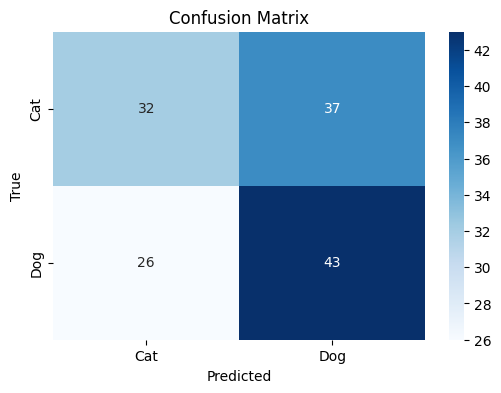

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat","Dog"], yticklabels=["Cat","Dog"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Found 555 files belonging to 2 classes.
Found 138 files belonging to 2 classes.
Epoch 1/10
18/18 [==============================] - 4s 102ms/step - loss: 2.6762 - accuracy: 0.5063 - val_loss: 1.1819 - val_accuracy: 0.5000
Epoch 2/10
18/18 [==============================] - 2s 87ms/step - loss: 1.4808 - accuracy: 0.4865 - val_loss: 0.9371 - val_accuracy: 0.4928
Epoch 3/10
18/18 [==============================] - 2s 85ms/step - loss: 0.9260 - accuracy: 0.5568 - val_loss: 0.7160 - val_accuracy: 0.4855
Epoch 4/10
18/18 [==============================] - 2s 89ms/step - loss: 0.6446 - accuracy: 0.6486 - val_loss: 0.6973 - val_accuracy: 0.5290
Epoch 5/10
18/18 [==============================] - 2s 87ms/step - loss: 0.6127 - accuracy: 0.6703 - val_loss: 0.7926 - val_accuracy: 0.5580
Epoch 6/10
18/18 [==============================] - 2s 89ms/step - loss: 0.7592 - accuracy: 0.6036 - val_loss: 1.0617 - val_accuracy: 0.5000
Epoch 7/10
18/18 [==============================] - 2s 86ms/step - loss: 

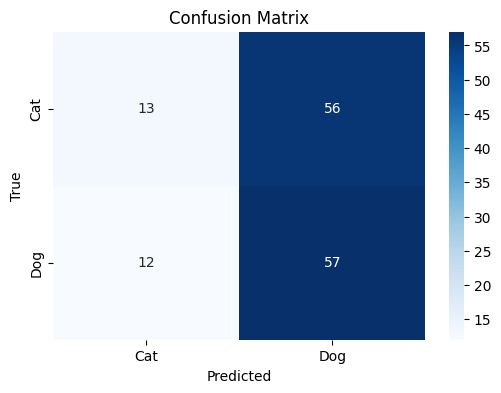

              precision    recall  f1-score   support

         Cat       0.52      0.19      0.28        69
         Dog       0.50      0.83      0.63        69

    accuracy                           0.51       138
   macro avg       0.51      0.51      0.45       138
weighted avg       0.51      0.51      0.45       138



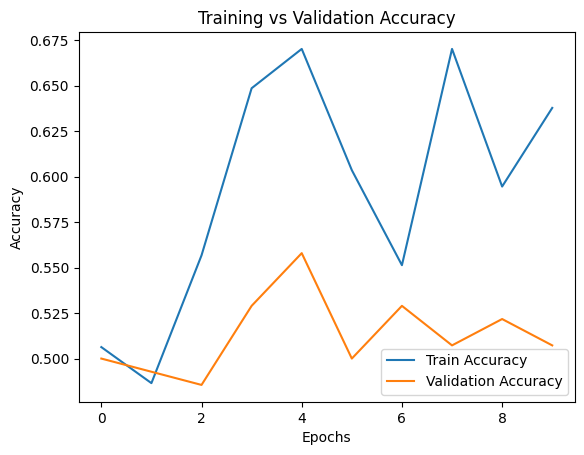

1/1 [==============================] - 0s 132ms/step


NameError: name 'prediction' is not defined

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------------------
# 1. LOAD DATASET
# -------------------------------
train_dir = r"C:\Users\ranji\Downloads\dataset\train"
test_dir  = r"C:\Users\ranji\Downloads\dataset\test"

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(64, 64),
    batch_size=32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(64, 64),
    batch_size=32,
    shuffle=False
)

# Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x, y: (normalization_layer(x), y))

# -------------------------------
# 2. BUILD ANN MODEL
# -------------------------------
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# -------------------------------
# 3. TRAIN MODEL
# -------------------------------
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

# -------------------------------
# 4. PREDICTION & ACCURACY
# -------------------------------
# Predictions
y_pred = model.predict(test_ds)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# True labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Accuracy
acc = accuracy_score(y_true, y_pred_classes)
print(f"✅ Final Test Accuracy: {acc*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat","Dog"], yticklabels=["Cat","Dog"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=["Cat","Dog"]))

# -------------------------------
# 5. TRAINING & VALIDATION ACCURACY PLOT
# -------------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# -------------------------------
# 6. TEST ON SINGLE IMAGE
# -------------------------------
from tensorflow.keras.preprocessing import image

img_path = r"C:\Users\ranji\Downloads\dataset\test\dogs\dog_43.jpg"  # change to any test image
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)[0][0]

if prediction > 0.5:
    label = "🐶 Dog"
else:
    label = "🐱 Cat"

# -------------------------------
# 3. SHOW IMAGE WITH PREDICTION
# -------------------------------
plt.imshow(image.load_img(img_path))   # show original image
plt.title(f"Prediction: {label}")
plt.axis("off")
plt.show()